In [2]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [3]:
crime_df = pd.read_csv("Bicycle_Thefts.csv", header=0)
crime_df['datetime'] = pd.to_datetime(crime_df['Occurrence_Date'] + " " + crime_df['Occurrence_Time'])
crime_df.set_index("datetime", inplace=True)
crime_df.drop(['Index_', "event_unique_id", "Occurrence_Date", "Occurrence_Year", "Occurrence_Month", "Occurrence_Day", "Occurrence_Time", "Hood_ID", "FID","City"], axis='columns', inplace=True)

crime_df

,X,Y,Primary_Offence,Division,Location_Type,premisetype,Bike_Make,Bike_Model,Bike_Type,Bike_Speed,Bike_Colour,Cost_of_Bike,Status,Neighbourhood,Lat,Long
datetime,,,,,,,,,,,,,,,,
2017-12-08 18:00:00,-79.378342,43.663109,THEFT UNDER - BICYCLE,51,"Apartment (Rooming House, Condo)",Apartment,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Church-Yonge Corridor (75),43.663109,-79.378342
2017-02-22 09:00:00,-79.398994,43.709587,THEFT UNDER - BICYCLE,53,Schools During Supervised Activity,Other,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Mount Pleasant West (104),43.709587,-79.398994
2017-02-19 11:00:00,-79.402824,43.657459,THEFT OF EBIKE UNDER $5000,14,Other Commercial / Corporate Places (For Profi...,Commercial,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,University (79),43.657459,-79.402824
2017-10-05 22:30:00,-79.331802,43.752232,MISCHIEF TO VEHICLE,33,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Parkwoods-Donalda (45),43.752232,-79.331802
2017-06-15 18:00:00,-79.423729,43.641132,THEFT UNDER - BICYCLE,14,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Little Portugal (84),43.641132,-79.423729
2017-06-17 19:51:00,-79.382263,43.644817,THEFT UNDER - BICYCLE,52,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Waterfront Communities-The Island (77),43.644817,-79.382263
2017-06-19 19:50:00,-79.414467,43.640011,THEFT UNDER - BICYCLE,14,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Niagara (82),43.640011,-79.414467
2017-06-19 18:00:00,-79.183968,43.784512,THEFT UNDER - BICYCLE,43,Universities / Colleges,Other,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Highland Creek (134),43.784512,-79.183968
2017-06-23 03:30:00,-79.528114,43.590206,THEFT UNDER - BICYCLE,22,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Long Branch (19),43.590206,-79.528114


In [151]:
crime_map = folium.Map(location=[43.6532, -79.3832], zoom_start=13)

latlon = crime_df.loc[:,['Y','X']]
latlonlist = [[row['Y'], row['X']] for _, row in latlon.iterrows()]
HeatMap(data=latlonlist).add_to(crime_map)
crime_map.save("crime_map.html")

In [152]:
theft_df = crime_df[["THEFT" in offence for offence in crime_df.Primary_Offence]]

theft_map = folium.Map(location=[43.6532, -79.3832], zoom_start=13)

latlon = theft_df.loc[:,['Y','X']]
latlonlist = [[row['Y'], row['X']] for _, row in latlon.iterrows()]
HeatMap(data=latlonlist).add_to(theft_map)
theft_map.save("theft_map.html")

In [153]:
ebike_df = crime_df[["EBIKE" in offence for offence in crime_df.Primary_Offence]]

ebike_map = folium.Map(location=[43.6532, -79.3832], zoom_start=13)

latlon = ebike_df.loc[:,['Y','X']]
latlonlist = [[row['Y'], row['X']] for _, row in latlon.iterrows()]
HeatMap(data=latlonlist).add_to(ebike_map)
ebike_map.save("ebike_crime_map.html")

In [154]:
be_df = crime_df[["B&E" in offence for offence in crime_df.Primary_Offence]]

be_map = folium.Map(location=[43.6532, -79.3832], zoom_start=13)

latlon = be_df.loc[:,['Y','X']]
latlonlist = [[row['Y'], row['X']] for _, row in latlon.iterrows()]
HeatMap(data=latlonlist).add_to(be_map)
be_map.save("breakingandentering_map.html")

Text(0.5,0,'Period')

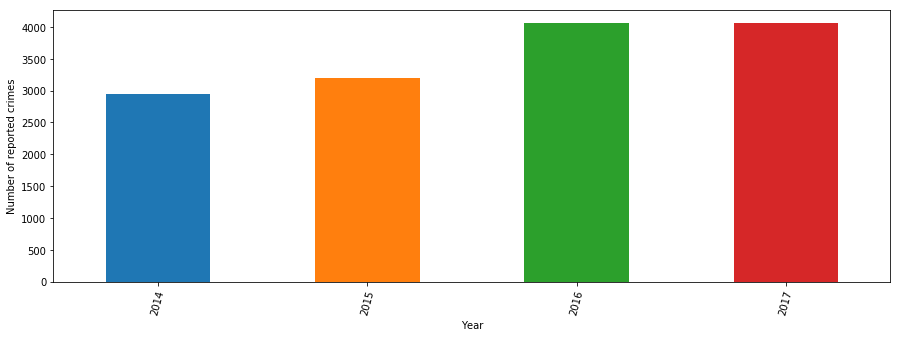

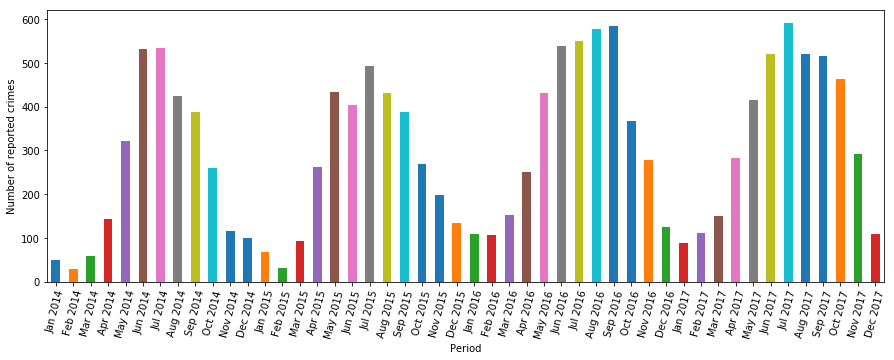

In [58]:
year = crime_df.resample("Y").count()
year['xaxis'] = year.index.strftime("%Y")
ax = year.plot(kind="bar",x="xaxis",y="Y", figsize=(15,5), rot=75, legend=False)
ax.set_ylabel("Number of reported crimes")
ax.set_xlabel("Year")

monthyear = crime_df.resample("m").count()
monthyear['xaxis'] = monthyear.index.strftime("%b %Y")
ax = monthyear.plot(kind="bar",x="xaxis",y="Y", figsize=(15,5), rot=75, legend=False)
ax.set_ylabel("Number of reported crimes")
ax.set_xlabel("Period")

Text(0.5,0,'Neighbourhood')

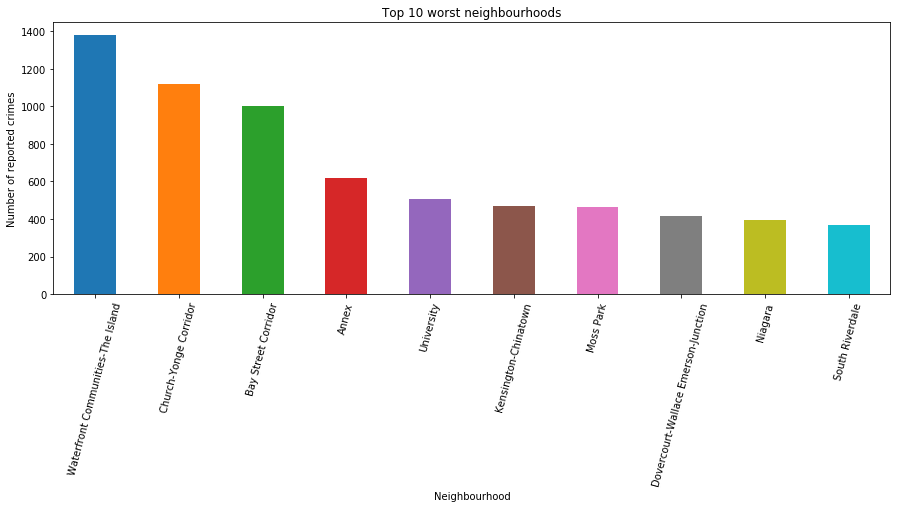

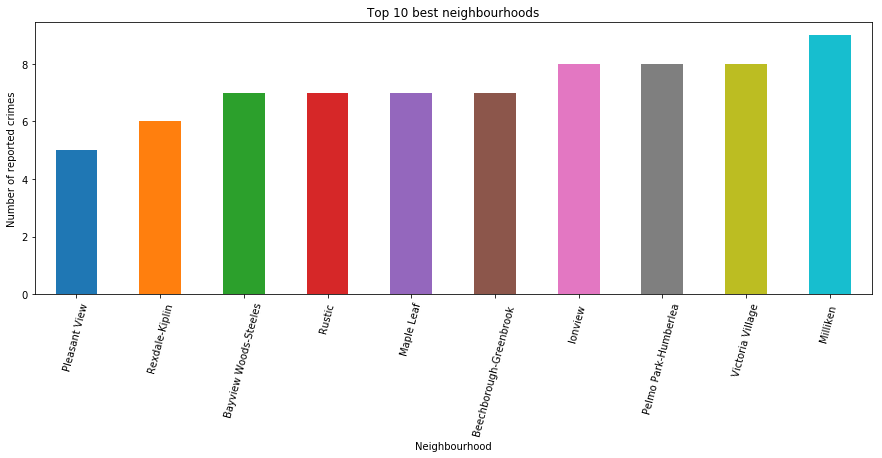

In [6]:
neighbourhood = crime_df.groupby("Neighbourhood").count()
neighbourhood['xaxis'] = [name[:-5] for name in neighbourhood.index]

neighbourhood.sort_values("Y", inplace=True, ascending=False)

nax = neighbourhood[:10].plot(kind="bar",x="xaxis",y="Y", figsize=(15,5), rot=75, legend=False, title="Top 10 worst neighbourhoods")
nax.set_ylabel("Number of reported crimes")
nax.set_xlabel("Neighbourhood")

ineighbourhood = neighbourhood.sort_values("Y")
inax = ineighbourhood[:10].plot(kind="bar",x="xaxis",y="Y", figsize=(15,5), rot=75, legend=False, title="Top 10 best neighbourhoods")
inax.set_ylabel("Number of reported crimes")
inax.set_xlabel("Neighbourhood")

c:\users\simon\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Text(0,0.5,'')

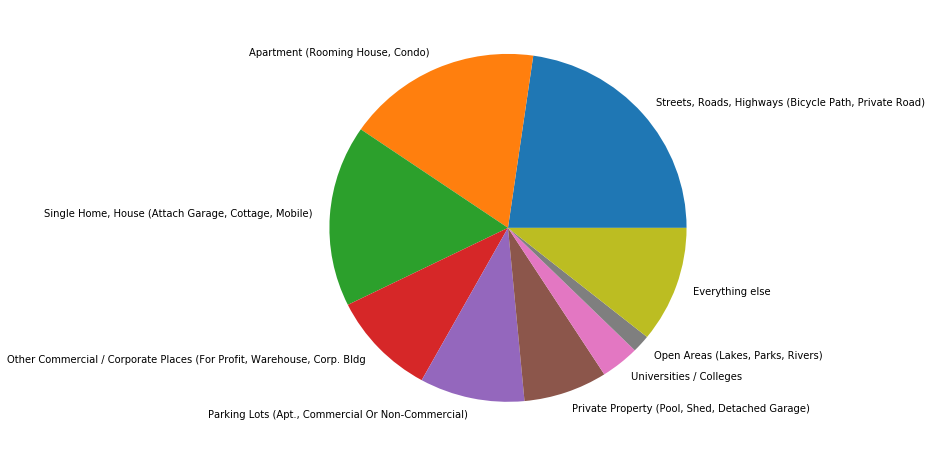

In [8]:
loc_df = crime_df.groupby("Location_Type").count().sort_values("Y", ascending=False)
total = sum(loc_df['Y'])
loc_df['percent'] = loc_df.Y*100/total
pie = loc_df[:8]
pie = pie.append(pd.DataFrame([['Everything else', 100-sum(pie.percent)]], columns=['Location_Type', 'percent']).set_index('Location_Type'))
ax = pie.plot(kind="pie", y="percent", figsize=(8,8), legend=False)
ax.set_ylabel("")

In [81]:
loc_df.loc[:,"percent"]

Location_Type
Streets, Roads, Highways (Bicycle Path, Private Road)                     22.738095
Apartment (Rooming House, Condo)                                          17.682073
Single Home, House (Attach Garage, Cottage, Mobile)                       16.876751
Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg     9.677871
Parking Lots (Apt., Commercial Or Non-Commercial)                          9.502801
Private Property (Pool, Shed, Detached Garage)                             7.591036
Universities / Colleges                                                    3.501401
Open Areas (Lakes, Parks, Rivers)                                          1.638655
Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)      1.435574
Bar / Restaurant                                                           1.407563
Schools During Supervised Activity                                         1.281513
Hospital / Institutions / Medical Facilities (Clinic, Dentist,

[0, 3000, 0, 2000]

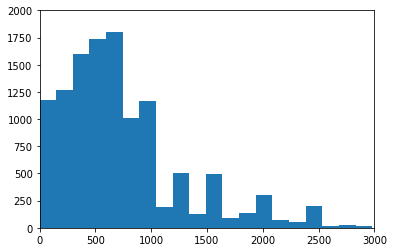

In [142]:
costs = crime_df[crime_df['Cost_of_Bike'].notnull()]
costs = costs[costs.Cost_of_Bike != "UNKNOWN"]
cost_array = np.array(costs.Cost_of_Bike.astype(float))
cost_array = [cost for cost in cost_array if cost < 3000]
plt.hist(cost_array,20)
plt.axis([0, 3000,0,2000])


Status
RECOVERED     1.274510
STOLEN       93.865546
UNKNOWN       4.859944
Name: percent, dtype: float64

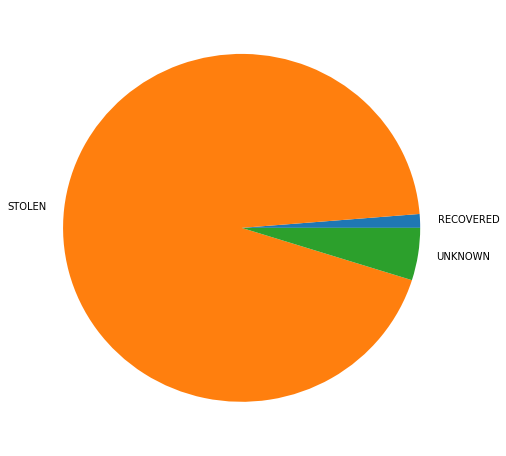

In [12]:
status_df = crime_df.groupby("Status").count()
status_df['percent'] = status_df['X']*100/total

sax = status_df.plot(kind="pie", y="percent", figsize=(8,8), legend=False)
sax.set_ylabel("")
status_df['percent']
# status_df

In [ ]:
#TODO: change in crime over years?